In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=7e7546d432fbfecbe0dd0fd11a1a6d16682d04611b7580c721b075bd096279b9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card (2).csv to UCI_Credit_Card (2).csv


In [12]:
base = pd.read_csv('UCI_Credit_Card (2).csv', header = 0)
base.shape

(30000, 25)

In [13]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [15]:
X = base.iloc[:,[1,25]].values

In [17]:
X = base.iloc[:,[1,25]].values

In [18]:
X.shape

(30000, 2)

In [19]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [20]:
r

(array([[ 308715.01579603, 1332270.94372399],
        [ 175795.88263091,  491926.73179788],
        [ 140102.36021009,   80565.48273612]]),
 array([[0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
         0.01726456],
        [0.07016171, 0.01898461, 0.01813603, ..., 0.05751351, 0.38187759,
         0.263165  ],
        [0.9199604 , 0.97855707, 0.98001033, ..., 0.9356369 , 0.59885271,
         0.71957044]]),
 array([[0.12119811, 0.22981034, 0.02154668, ..., 0.47262285, 0.30584527,
         0.69421092],
        [0.34465093, 0.32586179, 0.42283694, ..., 0.37941076, 0.39630936,
         0.09629514],
        [0.53415096, 0.44432787, 0.55561638, ..., 0.14796639, 0.29784537,
         0.20949394]]),
 array([[1355667.34442945, 1328664.16629453, 1249902.70883381, ...,
         1292191.18888802, 1089927.3710245 , 1131374.68905879],
        [ 508668.86186845,  478116.56351467,  399592.94188944, ...,
          445937.55291052,  244834.6995927 ,  289781.18100737],
        [ 140475

In [21]:
previsoes_porcentagem = r[1]

In [23]:
previsoes_porcentagem.shape

(3, 30000)

In [27]:
previsoes_porcentagem

array([[0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
        0.01726456],
       [0.07016171, 0.01898461, 0.01813603, ..., 0.05751351, 0.38187759,
        0.263165  ],
       [0.9199604 , 0.97855707, 0.98001033, ..., 0.9356369 , 0.59885271,
        0.71957044]])

In [28]:
previsoes_porcentagem[0][0]

0.009877889906605776

In [29]:
previsoes_porcentagem[1][0]

0.07016170669927092

In [30]:
previsoes_porcentagem[2][0]

0.9199604033941233

In [31]:
previsoes_porcentagem[0][0] + previsoes_porcentagem [1][0] + previsoes_porcentagem [2][0]

1.0

previsoes = previsoes_porcentagem.argmax(axis=0)

In [36]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [37]:
previsoes[5000]

2

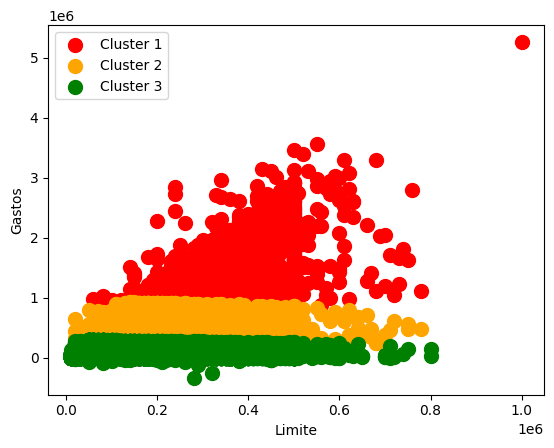

In [38]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();